[View in Colaboratory](https://colab.research.google.com/github/thatwist/p24-lions/blob/master/test.ipynb)

In [2]:
import h5py

In [20]:
f = h5py.File('data/ITOP_top_train_depth_map.h5', 'r+')

In [24]:
list(f.keys())

['data', 'id']

In [25]:
data = f['data']

In [26]:
data.dtype

dtype('<f2')

In [27]:
data.shape

(39795, 240, 320)

In [4]:
train_labels = h5py.File('data/ITOP_top_train_labels.h5', 'r')

In [5]:
test_labels = h5py.File('data/ITOP_top_test_labels.h5', 'r')

In [7]:
list(train_labels.keys())

['id',
 'image_coordinates',
 'is_valid',
 'real_world_coordinates',
 'segmentation',
 'visible_joints']

In [4]:
labels['id'].shape[0]

39795

In [8]:
import h5py
import numpy as np
import cv2
from matplotlib import pyplot as plt
 
joint_id_to_name = {
  0: 'Head',
  1: 'Neck',
  2: 'R Shoulder',
  3: 'L Shoulder',
  4: 'R Elbow',
  5: 'L Elbow',
  6: 'R Hand',
  7: 'L Hand',
  8: 'Torso',
  9: 'R Hip',
  10: 'L Hip',
  11: 'R Knee',
  12: 'L Knee',
  13: 'R Foot',
  14: 'L Foot',
}

In [9]:
def depth_map_to_image(depth_map, joints=None):
    img = cv2.normalize(depth_map, depth_map, 0, 1, cv2.NORM_MINMAX)
    img = np.array(img * 255, dtype = np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img = cv2.applyColorMap(img, cv2.COLORMAP_OCEAN)
    if joints != None:
        for j in range(13):
            x, y = joints[j, 0], joints[j, 1]
            cv2.circle(img, (x,y), 1, (255,255,255), thickness=2)
            cv2.putText(img, joint_id_to_name[j], (x+5, y+5), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255,255,255))
    return img

In [10]:
def label_to_csv_tuple(image_name, joints):
    # header: class	fileName	height	width	xmax	xmin	ymax	ymin
    # consider head as 76x76 dimension in this dataset
    xHead, yHead = joints[0, 0], joints[0, 1]
    row = ('head', image_name, 76, 76, xHead + 38, xHead - 38, yHead + 38, yHead - 38)
    return row

In [11]:
import csv

# extract into csv to be used by https://github.com/datitran/raccoon_dataset/blob/master/generate_tfrecord.py
# to generate TFRecords
def generate_csv_labels(labels, path):
 
    with open(path, 'w', newline='') as csvfile:
        filewriter = csv.writer(csvfile, delimiter=',',
                                quotechar='|', quoting=csv.QUOTE_MINIMAL)
        filewriter.writerow(['class', 'filename', 'height', 'width', 'xmax', 'xmin', 'ymax', 'ymin'])
        
        for i in range(labels['id'].shape[0]):
            if labels['is_valid'][i]:
                joints = labels['image_coordinates'][i]
                fileName = labels['id'][i].decode('UTF-8') + ".jpg"
                rowTuple = label_to_csv_tuple(fileName, joints)
                row = list(rowTuple)
                filewriter.writerow(row)

In [12]:
train_labels = h5py.File('data/ITOP_top_train_labels.h5', 'r')

In [14]:
test_labels = h5py.File('data/ITOP_top_test_labels.h5', 'r')

In [13]:
generate_csv_labels(train_labels, 'data/train.csv')

In [15]:
generate_csv_labels(test_labels, 'data/test.csv')

In [100]:
str(labels['id'][0].decode('UTF-8'))

'04_00000'

In [124]:
def generate_imgs(depth_maps, labels):
    for i in range(labels['id'].shape[0]):
        if labels['is_valid'][i]:
            fileName = labels['id'][i].decode('UTF-8') + ".jpg"
            print('generating #{}: id={}'.format(i, fileName))
            depth_map = depth_maps['data'][i].astype(np.float32)
            img = depth_map_to_image(depth_map)
            cv2.imwrite("data/" + fileName, img)

In [90]:
depth_maps = h5py.File('data/ITOP_top_train_depth_map.h5', 'r')
labels = h5py.File('data/ITOP_top_train_labels.h5', 'r')

In [ ]:
generate_imgs(depth_maps, labels)

In [123]:
#generate TFRecords
!python generate_tfrecord.py --csv_input=data/train.csv  --output_path=data/train.record

Traceback (most recent call last):
  File "generate_tfrecord.py", line 19, in <module>
    from object_detection.utils import dataset_util
ModuleNotFoundError: No module named 'object_detection'


In [36]:
def main():
    depth_maps = h5py.File('data/ITOP_top_train_depth_map.h5', 'r')
    labels = h5py.File('data/ITOP_top_train_labels.h5', 'r')
    print(range(depth_maps['data'].shape[0]))
    for i in range(0, 10):
#     for i in range(depth_maps['data'].shape[0]):
        if labels['is_valid'][i]:
            print('i={}'.format(i))
            depth_map = depth_maps['data'][i].astype(np.float32)
            joints = labels['image_coordinates'][i]
            img = depth_map_to_image(depth_map, joints)
            cv2.imshow("Image", img)
            fig_size = plt.rcParams["figure.figsize"]
            # Set figure width to 12 and height to 9
            fig_size[0] = 12
            fig_size[1] = 9
            plt.rcParams["figure.figsize"] = fig_size
            plt.imshow(img)
            plt.show()
            #cv2.waitKey(0)
            # ...
            # Your code here
            # ...
    return 0

range(0, 39795)
i=0


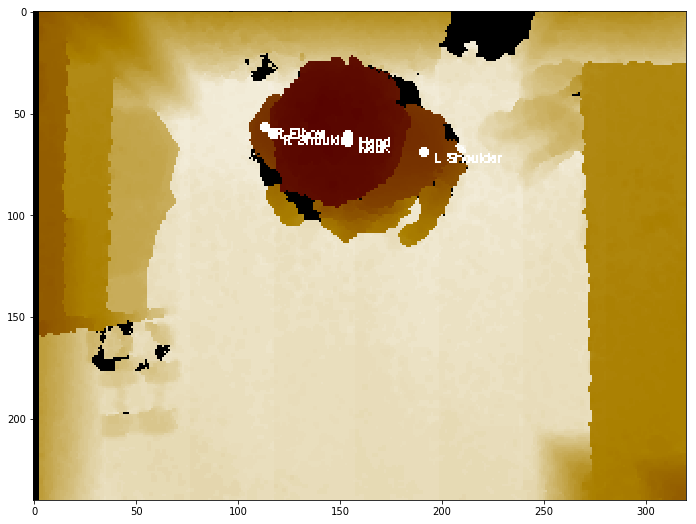

i=1


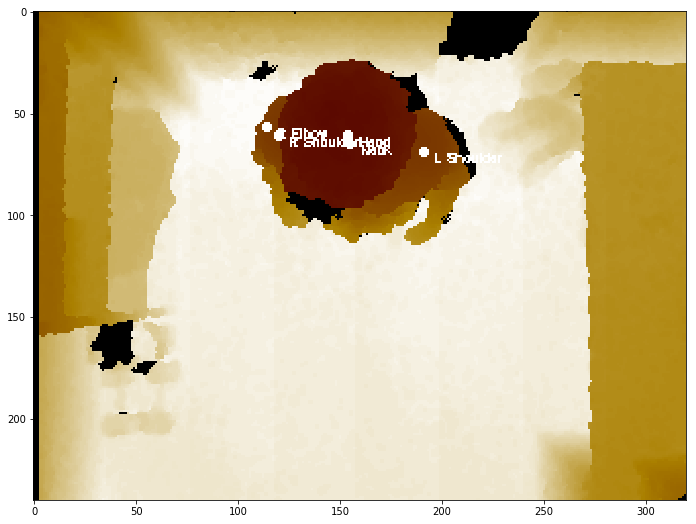

i=2


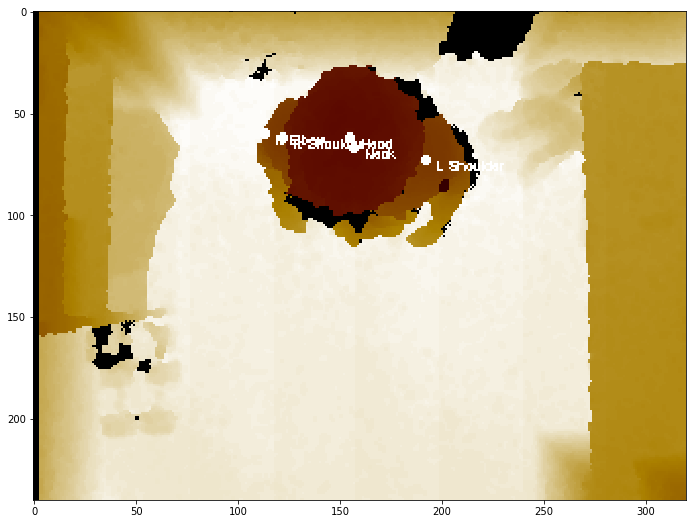

i=3


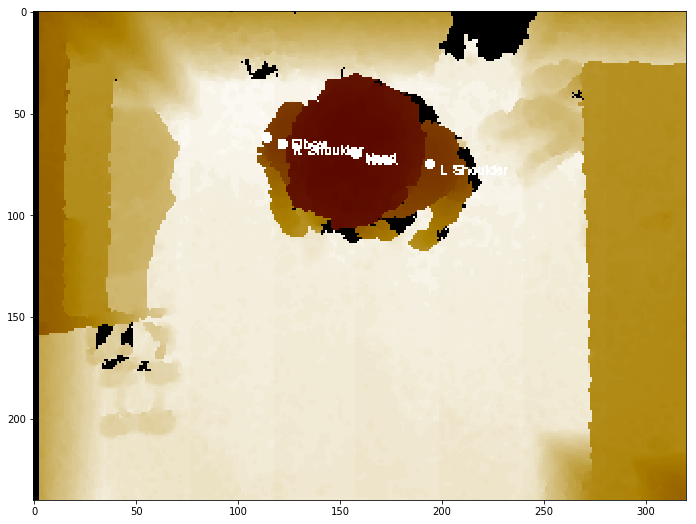

i=4


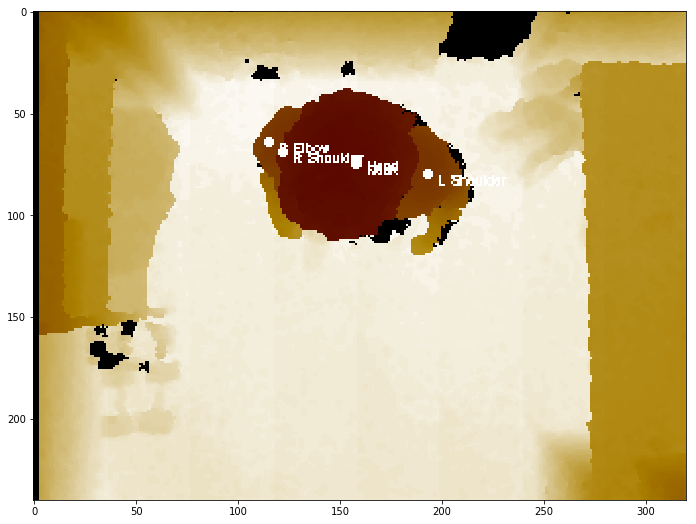

i=5


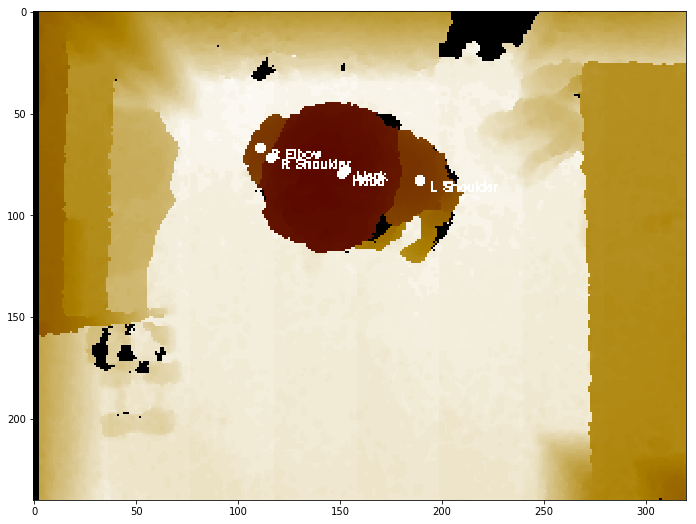

i=6


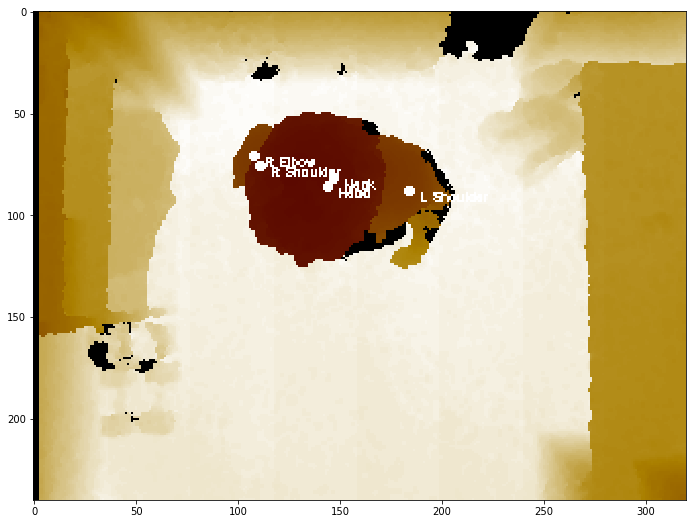

i=7


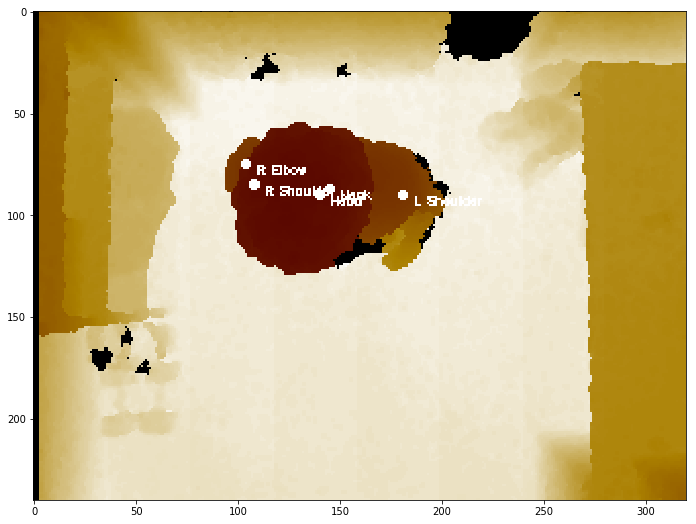

i=8


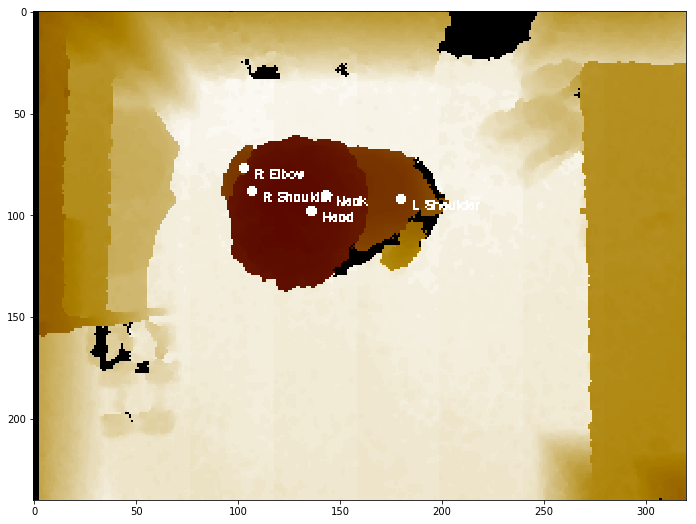

i=9


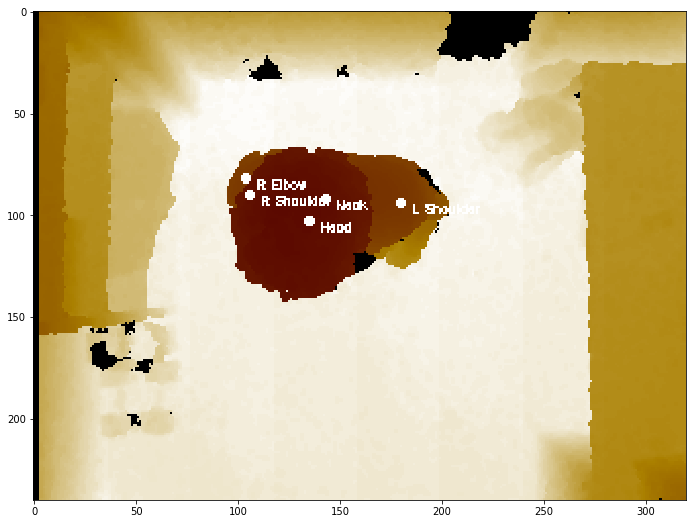

0

In [37]:
main()

In [ ]:
!ls